# Recognizing Superheroes

This notebook is an attempt at solving the image classification problem solved [earlier](https://github.com/koushik-ms/educated-nerves/blob/master/custom-image-classifier-tensorflow.md) using the state-of-the art approach as on date (Jul 2020).

This notebook is heavily based on [Lesson 2](https://course.fast.ai/videos?lesson=2) in the fantastic Deep learning course by [fast.ai](https://fast.ai/). I highly recommend this course for anyone who is interested in learning ML/DL with an intention to apply it in their personal/ professional projects.

In [1]:
from fastai.vision import *

In [2]:
classes = ['batman', 'elsa', 'vader']
classes

['batman', 'elsa', 'vader']

### Pre-requisites

The following items must be present in the workspace:
1. The path `/content/super` (Path)
1. training set image URLs (*_images.csv) in Path (URLs)
1. The path `/content/inference` (inference folder)
1. The prediction images in inference folder (imagesfg.jpg, images90.jpg)


### Downloading the Training data

It's time to download the training data set. Using google image search we  search for our superheroes and download the image results using the following piece of code that is copied from the Lesson-2 notebook.

```js
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```
Paste above code in the JS console to download list of search results as a list of URLs that can be used in the cell below. Upload the URL lists into `/content/super/` and run the cell below. There must be one file per class named `<class-label>_images.csv`.


In [3]:
path = Path('/content')/'super'
path.mkdir(parents=True, exist_ok=True)
for hero in classes:
  datafile = f"{hero}_images.csv"
  dest = path/hero
  dest.mkdir(parents=True, exist_ok=True)
  print(f"{hero}\t{datafile}")
  download_images(path/datafile, dest, max_pics=200)
path.ls()


batman	batman_images.csv


elsa	elsa_images.csv


vader	vader_images.csv


[PosixPath('/content/super/batman'),
 PosixPath('/content/super/vader_images.csv'),
 PosixPath('/content/super/elsa'),
 PosixPath('/content/super/vader'),
 PosixPath('/content/super/elsa_images.csv'),
 PosixPath('/content/super/batman_images.csv')]

In [4]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

batman


elsa


vader


In [5]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

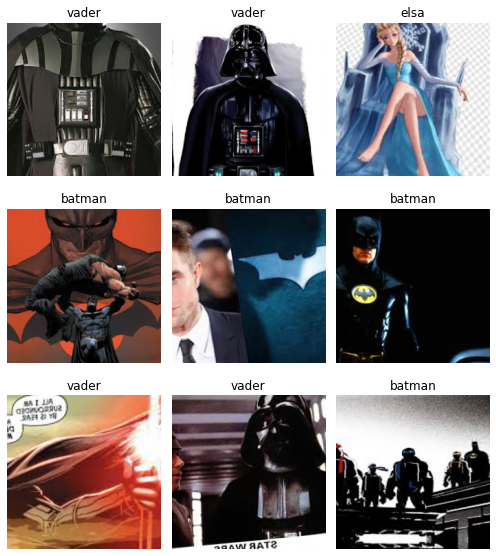

In [6]:
data.show_batch(rows=3, figsize=(7,8))

In [7]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['batman', 'elsa', 'vader'], 3, 416, 104)

### Train the model

In [8]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [9]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.632464,0.293131,0.105769,00:09
1,0.963998,0.250446,0.076923,00:06
2,0.691706,0.226487,0.057692,00:06
3,0.555074,0.216700,0.057692,00:06


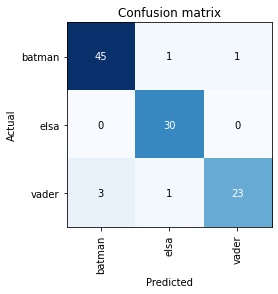

In [10]:
learn.save('stage-1')
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

### Prediction


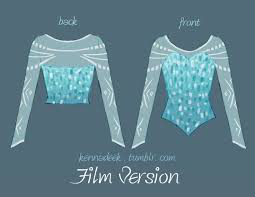

In [14]:
learn.export()
defaults.device = torch.device('cpu')
img = open_image(path.parent/'inference'/'imagesfg.jpg')
img

In [15]:
learn = load_learner(path)
pred_class,pred_idx,outputs = learn.predict(img)
pred_class, pred_idx, outputs

(Category tensor(1), tensor(1), tensor([7.1590e-04, 9.9735e-01, 1.9385e-03]))

In [16]:
learn.data.classes[pred_idx]

'elsa'